<a href="https://www.kaggle.com/code/filipkin/starter?scriptVersionId=203130448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install lazypredict

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import math
import missingno as msno
import matplotlib.pyplot as plt
import re
import lazypredict

from sklearn.preprocessing import OneHotEncoder
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor


In [3]:
df = pd.read_csv("/kaggle/input/warsaw-flat-rent-prices/otodom_complete.csv")

In [4]:
df.head()

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
0,1612265907-2487,https://www.otodom.pl/wynajem/mieszkanie/warsz...,37 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-od-zar...,"Warszawa, Włochy, ul. 1 Sierpnia",2 100 zł,Kaucja:2 100 zł,Powierzchnia:37 m²,Liczba pokoi:2,NaN,...,klimatyzacja,Nr oferty w Otodom: 61451923,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 3 dni temu,NaN,NaN,NaN,NaN
1,1612264314-1965,https://www.otodom.pl/wynajem/mieszkanie/warsz...,38 m²\n \n ...,https://www.otodom.pl/pl/oferta/2-pokoje-tanio...,"Warszawa, Mokotów, ul. Suwak 11",1 825 zł,Kaucja:3 400 zł,Powierzchnia:38 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,garaż/miejsce parkingowewindapom. użytkowe,Nr oferty w Otodom: 61405987,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:350 zł,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN
2,1612263242-1616,https://www.otodom.pl/wynajem/mieszkanie/warsz...,57 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-mieszk...,"Warszawa, Bielany, ul. Kwitnąca",3 300 zł,Kaucja:3 300 zł,Powierzchnia:57 m²,Liczba pokoi:3,Rodzaj zabudowy:blok,...,balkontylko dla niepalącychoddzielna kuchnia,Nr oferty w Otodom: 61375474,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:1 zł,Data aktualizacji: 22 dni temu,NaN,NaN,NaN,NaN
3,1612265477-2346,https://www.otodom.pl/wynajem/mieszkanie/warsz...,63 m²\n \n ...,https://www.otodom.pl/pl/oferta/zielone-zacisz...,"Warszawa, Targówek, ul. św. Wincentego",2 200 zł,NaN,Powierzchnia:63 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,NaN,Nr oferty w Otodom: 61439492,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 5 dni temu,NaN,NaN,NaN,NaN
4,1612266187-2579,https://www.otodom.pl/wynajem/mieszkanie/warsz...,65 m²\n \n ...,https://www.otodom.pl/pl/oferta/eleganckie-mie...,"Warszawa, Ochota, Stara Ochota, ul. Juliana Ur...",3 000 zł,Kaucja:3 000 zł,Powierzchnia:65 m²,Liczba pokoi:3,Rodzaj zabudowy:kamienica,...,NaN,Nr oferty w Otodom: 61455072,NaN,NaN,NaN,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'offer_url',
       'offer_url-href', 'location', 'net_price', 'deposit', 'area',
       'room_num', 'build_type', 'floor', 'total_floor', 'build_mat',
       'windows', 'heating', 'year_built', 'status', 'agd', 'security',
       'add_info', 'rest_info', 'offer_ID', 'next_pagination',
       'next_pagination-href', 'add_cost', 'offer_last_update', 'second_page',
       'second_page-href', 'third_page', 'third_page-href'],
      dtype='object')

In [6]:
df.describe()

,next_pagination,second_page,third_page
count,0.00,137.00,41.00
mean,NaN,2.00,3.00
std,NaN,0.00,0.00
min,NaN,2.00,3.00
25%,NaN,2.00,3.00
50%,NaN,2.00,3.00
75%,NaN,2.00,3.00
max,NaN,2.00,3.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      3482 non-null   object 
 1   web-scraper-start-url  3482 non-null   object 
 2   offer_url              3482 non-null   object 
 3   offer_url-href         3482 non-null   object 
 4   location               3481 non-null   object 
 5   net_price              3481 non-null   object 
 6   deposit                3146 non-null   object 
 7   area                   3481 non-null   object 
 8   room_num               3481 non-null   object 
 9   build_type             3339 non-null   object 
 10  floor                  3401 non-null   object 
 11  total_floor            3045 non-null   object 
 12  build_mat              2239 non-null   object 
 13  windows                2899 non-null   object 
 14  heating                2998 non-null   object 
 15  year

In [8]:
df.shape

(3482, 30)

In [9]:
df.isna().sum()

web-scraper-order           0
web-scraper-start-url       0
offer_url                   0
offer_url-href              0
location                    1
net_price                   1
deposit                   336
area                        1
room_num                    1
build_type                143
floor                      81
total_floor               437
build_mat                1243
windows                   583
heating                   484
year_built               1014
status                    291
agd                        47
security                   90
add_info                  292
rest_info                1470
offer_ID                    1
next_pagination          3482
next_pagination-href     1014
add_cost                 1567
offer_last_update           1
second_page              3345
second_page-href         3345
third_page               3441
third_page-href          3441
dtype: int64

In [10]:
df.drop(["web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","third_page-href","web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","next_pagination","next_pagination-href","offer_last_update","second_page","second_page-href","third_page","third_page-href","offer_ID"], axis = 1, inplace = True)

In [11]:
columns_to_clean = ["deposit","room_num","area","total_floor","floor","net_price","year_built","add_cost"]
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.replace(r'\D', '', regex=True))

In [12]:
df['location'] = df['location'].str.split(',').str[1].str.strip()

In [13]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,heating,year_built,status,agd,security,add_info,rest_info,add_cost
0,Włochy,2100,2100,37,2,NaN,,4,NaN,Okna:plastikowe,NaN,NaN,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,domofon / wideofon,internet,klimatyzacja,NaN
1,Mokotów,1825,3400,38,2,Rodzaj zabudowy:blok,,NaN,Materiał budynku:pustak,Okna:plastikowe,Ogrzewanie:miejskie,2020,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,domofon / wideofonmonitoring / ochrona,telewizja kablowainternet,garaż/miejsce parkingowewindapom. użytkowe,350
2,Bielany,3300,3300,57,3,Rodzaj zabudowy:blok,,15,Materiał budynku:wielka płyta,Okna:drewniane,Ogrzewanie:miejskie,1984,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamaniowedomofon / wideofonm...,telewizja kablowainternet,balkontylko dla niepalącychoddzielna kuchnia,1
3,Targówek,2200,NaN,63,2,Rodzaj zabudowy:blok,4,5,Materiał budynku:cegła,Okna:drewniane,Ogrzewanie:miejskie,2005,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,balkon,NaN,NaN
4,Ochota,3000,3000,65,3,Rodzaj zabudowy:kamienica,3,4,Materiał budynku:cegła,Okna:plastikowe,Ogrzewanie:miejskie,1938,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,drzwi / okna antywłamanioweteren zamkniętydomo...,piwnicawindatylko dla niepalącychoddzielna kuc...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000,2500,45,1,Rodzaj zabudowy:apartamentowiec,3,7,NaN,NaN,NaN,NaN,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,monitoring / ochrona,telewizja kablowainternettelefon,winda,350
3478,Wilanów,3300,3000,50,2,Rodzaj zabudowy:blok,1,2,Materiał budynku:cegła,Okna:plastikowe,Ogrzewanie:miejskie,2006,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamanioweteren zamkniętydomo...,telewizja kablowainternet,balkonpiwnicagaraż/miejsce parkingowepom. użyt...,NaN
3479,Praga-Południe,2500,2500,4666,2,Rodzaj zabudowy:apartamentowiec,5,5,Materiał budynku:cegła,Okna:plastikowe,Ogrzewanie:miejskie,2015,Stan wykończenia:do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,telewizja kablowainternettelefon,balkongaraż/miejsce parkingowewindatylko dla n...,NaN
3480,Praga-Północ,1300,1700,23,1,Rodzaj zabudowy:kamienica,,4,Materiał budynku:cegła,Okna:drewniane,Ogrzewanie:kotłownia,1938,Stan wykończenia:do zamieszkania,lodówkameblepralka,drzwi / okna antywłamaniowe,internet,tylko dla niepalących,270


In [14]:
# Define the list of columns to check
columns_to_check = ['add_info', 'rest_info', 'security', 'agd']

# Example list of common words to search for and remove
common_words = ['internet', 'balkon', 'piwnica',"telewizja kablowa","winda", "garaż/miejsce parkingowe","taras","ogródek","winda","telefon","oddzielna kuchnia",
                
                "pom. użytkowe","klimatyzacja","dwupoziomowe","tylko dla niepalących","wynajmę również studentom","zmywarka","lodówka","pralka","kuchenka","meble","piekarnik","telewizor"
               ,"drzwi / okna antywłamaniowe","monitoring","teren zamknięty","ochrona","domofon / wideofon", "system alarmowy", "rolety antywłamaniowe", "system alarmowy / rolety antywłamaniowe"
               ]  # Add more words as needed

# Step 1: Loop through each word in the common words list
for word in common_words:
    # Create a new flag column for each word (e.g., is_poddasze, is_internet, etc.)
    flag_column = f'is_{word}'
    df[flag_column] = df[columns_to_check].apply(lambda row: any(word in str(x).lower() for x in row), axis=1).astype(int)
    
    # Step 2: Remove the word from the specified columns
    for col in columns_to_check:
        df[col] = df[col].apply(lambda x: str(x).replace(word, '').strip() if pd.notna(x) else x)

# Display the updated dataframe
df.head()


,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,...,is_piekarnik,is_telewizor,is_drzwi / okna antywłamaniowe,is_monitoring,is_teren zamknięty,is_ochrona,is_domofon / wideofon,is_system alarmowy,is_rolety antywłamaniowe,is_system alarmowy / rolety antywłamaniowe
0,Włochy,2100,2100,37,2,NaN,,4,NaN,Okna:plastikowe,...,1,1,0,0,0,0,1,0,0,0
1,Mokotów,1825,3400,38,2,Rodzaj zabudowy:blok,,NaN,Materiał budynku:pustak,Okna:plastikowe,...,1,0,0,1,0,1,1,0,0,0
2,Bielany,3300,3300,57,3,Rodzaj zabudowy:blok,,15,Materiał budynku:wielka płyta,Okna:drewniane,...,1,1,1,1,0,1,1,0,0,0
3,Targówek,2200,NaN,63,2,Rodzaj zabudowy:blok,4,5,Materiał budynku:cegła,Okna:drewniane,...,1,1,0,1,1,1,1,0,0,0
4,Ochota,3000,3000,65,3,Rodzaj zabudowy:kamienica,3,4,Materiał budynku:cegła,Okna:plastikowe,...,1,0,1,0,1,0,1,0,0,0


In [15]:
df["add_info"].unique()

array(['', nan], dtype=object)

In [16]:
df["rest_info"].unique()


array(['', nan], dtype=object)

In [17]:
df["security"].unique()

array(['', '/', nan], dtype=object)

In [18]:
df["agd"].unique()

array(['', nan, '/'], dtype=object)

In [19]:
df.drop(["agd","security","rest_info","add_info"], axis = 1, inplace = True)

In [20]:
columns_to_clean = [df.columns]
for col in columns_to_clean:
    df[col] = df[col].replace(['', '/'], np.nan)

In [21]:

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_data = encoder.fit_transform(df[['location', 'build_type',"build_mat","windows","heating","status"]])


In [22]:
# Step 2: Convert the encoded data to a DataFrame with the correct column names
encoded_columns = encoder.get_feature_names_out(['location', 'build_type', 'build_mat', 'windows', 'heating', 'status'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Step 3: Reset the index of the encoded DataFrame to match the original DataFrame's index
encoded_df.index = df.index

# Step 4: Drop the original categorical columns from the original DataFrame
df_dropped = df.drop(columns=['location', 'build_type', 'build_mat', 'windows', 'heating', 'status'])

# Step 5: Concatenate the original DataFrame (with dropped columns) and the encoded DataFrame
final_df = pd.concat([df_dropped, encoded_df], axis=1)

# Display the final DataFrame after merging the one-hot encoded data
final_df.head()

,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,is_internet,is_balkon,...,heating_Ogrzewanie:elektryczne,heating_Ogrzewanie:gazowe,heating_Ogrzewanie:inne,heating_Ogrzewanie:kotłownia,heating_Ogrzewanie:miejskie,heating_nan,status_Stan wykończenia:do remontu,status_Stan wykończenia:do wykończenia,status_Stan wykończenia:do zamieszkania,status_nan
0,2100,2100,37,2,NaN,4,NaN,NaN,1,0,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,1825,3400,38,2,NaN,NaN,2020,350,1,0,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,3300,3300,57,3,NaN,15,1984,1,1,1,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
3,2200,NaN,63,2,4,5,2005,NaN,0,1,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
4,3000,3000,65,3,3,4,1938,NaN,0,0,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [23]:
final_df.isna().sum()

net_price                                    1
deposit                                    336
area                                         1
room_num                                     1
floor                                      422
                                          ... 
heating_nan                                  0
status_Stan wykończenia:do remontu           0
status_Stan wykończenia:do wykończenia       0
status_Stan wykończenia:do zamieszkania      0
status_nan                                   0
Length: 94, dtype: int64

<Axes: >

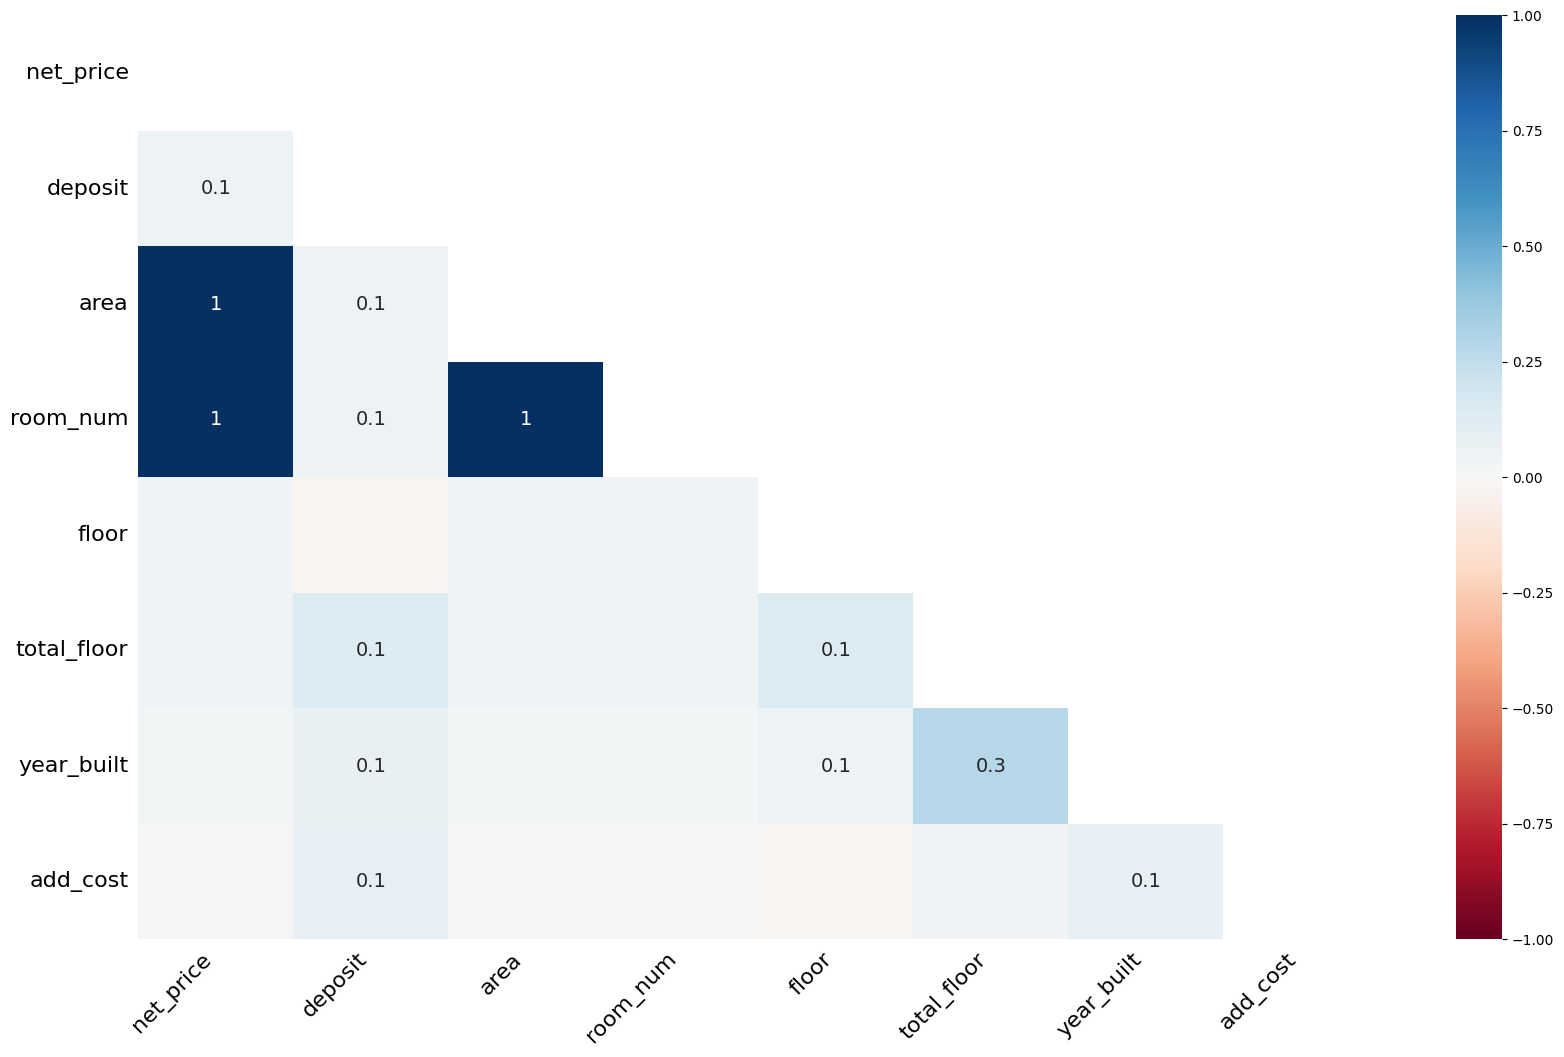

In [24]:
msno.heatmap(final_df)

In [25]:
imputer = KNNImputer(n_neighbors=3)

In [26]:
final_df_imputed = pd.DataFrame(imputer.fit_transform(final_df), columns = final_df.columns)

In [27]:
final_df_imputed.head(10)

,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,is_internet,is_balkon,...,heating_Ogrzewanie:elektryczne,heating_Ogrzewanie:gazowe,heating_Ogrzewanie:inne,heating_Ogrzewanie:kotłownia,heating_Ogrzewanie:miejskie,heating_nan,status_Stan wykończenia:do remontu,status_Stan wykończenia:do wykończenia,status_Stan wykończenia:do zamieszkania,status_nan
0,2100.00,2100.00,37.00,2.00,1.67,4.00,2002.33,408.33,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,1825.00,3400.00,38.00,2.00,1.33,8.00,2020.00,350.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,3300.00,3300.00,57.00,3.00,6.33,15.00,1984.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
3,2200.00,3133.33,63.00,2.00,4.00,5.00,2005.00,516.67,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
4,3000.00,3000.00,65.00,3.00,3.00,4.00,1938.00,616.67,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
5,2600.00,2600.00,50.00,2.00,1.00,3.00,1957.00,38022.00,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
6,1600.00,1000.00,31.00,1.00,5.00,7.00,1975.33,268.33,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
7,1800.00,1800.00,20.00,1.00,2.00,4.00,2000.00,100.00,1.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
8,3700.00,6500.00,90.00,3.00,8.00,8.00,2020.00,1000.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
9,2200.00,3000.00,79.00,3.00,1.00,3.00,2004.00,800.00,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [28]:
round(final_df_imputed["floor"], 0)

0      2.00
1      1.00
2      6.00
3      4.00
4      3.00
       ... 
3477   3.00
3478   1.00
3479   5.00
3480   4.00
3481   1.00
Name: floor, Length: 3482, dtype: float64

<Axes: xlabel='deposit', ylabel='Count'>

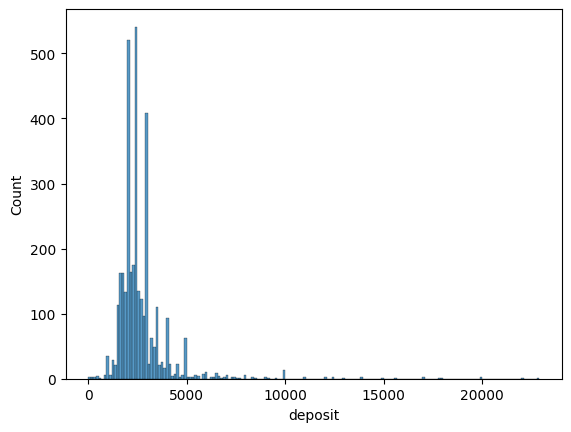

In [29]:
sns.histplot(data = final_df_imputed, x = "deposit")

(0.0, 30000.0)

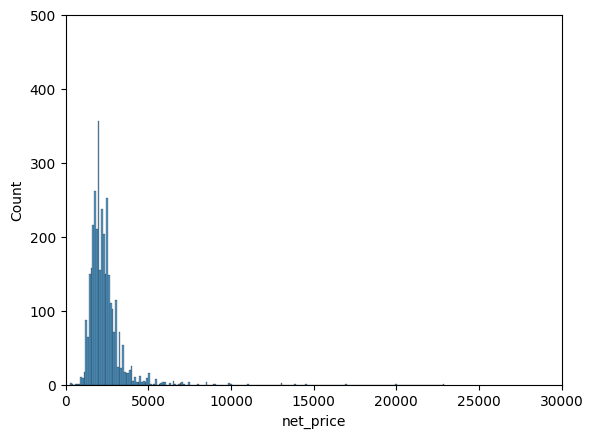

In [30]:
sns.histplot(data = final_df_imputed, x = "net_price")
plt.ylim(0, 500)
plt.xlim(0,30000)

In [31]:
count_price = final_df_imputed[final_df_imputed['net_price'] > 5000].shape[0]


In [32]:
count_price

56

In [33]:
count_price_df = final_df_imputed[final_df_imputed['net_price'] > 5000]
count_price

56

(0.0, 5000.0)

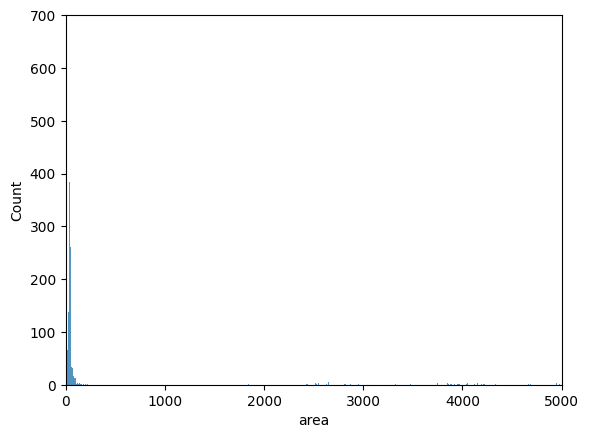

In [34]:
sns.histplot(data = final_df_imputed, x = "area", stat = "count")
plt.ylim(0, 700)
plt.xlim(0,5000)

In [35]:
count = final_df_imputed[final_df_imputed['area'] > 1000].shape[0]


In [36]:
count

309

In [37]:
count_both = final_df_imputed[(final_df_imputed['area'] > 1000) & (final_df_imputed["net_price"] > 5000)].shape[0]


In [38]:
count_both

4

In [39]:
X = final_df_imputed.drop(columns=['net_price'])  

y = final_df_imputed['net_price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


 74%|███████▍  | 31/42 [00:30<00:12,  1.18s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:38<00:00,  1.10it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 2785, number of used features: 76
[LightGBM] [Info] Start training from score 2338.138121
                                          Adjusted R-Squared  \
Model                                                          
BaggingRegressor                                        0.84   
RandomForestRegressor                                   0.82   
GradientBoostingRegressor                               0.82   
ExtraTreesRegressor                                     0.81   
XGBRegressor                                            0.79   
LGBMRegressor                                           0.77   
LassoLarsIC                                             0.76   
LassoLars        

In [41]:
from sklearn.linear_model import Lasso
model3 = Lasso(alpha =0.1, random_state = 42)

In [42]:
model3.fit(X_train,y_train)

Lasso(alpha=0.1, random_state=42)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error


    
# Make predictions on training and test data
y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)
    
 # R² Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
    
    # RMSE Score
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    
print(f"{model3} - Training R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
print(f"{model3} - Training RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}\n")


Lasso(alpha=0.1, random_state=42) - Training R²: 0.7884, Test R²: 0.7939
Lasso(alpha=0.1, random_state=42) - Training RMSE: 485.0564, Test RMSE: 552.7999

